____________________
# Exploring (and Mining) XML with BeautifulSoup

**XML** stands for **eXtensible Markup Language**, and mainly serves to transport and store data. At its core, XML was designed to be **both machine- and human-readable**. 

XML is used widely on the web--**HTML** files are a kind of XML, in this case used for structured graphical representation of content. Read more about [**XML**](https://www.w3schools.com/xml/xml_syntax.asp).

In the case of music files, the common encoding standard is **MEI**, which stands for **Music Encoding Initiative** and is built on top of the XML framework. Read more about [**MEI**](https://music-encoding.org/).

**Beautiful Soup** is a Python library that allows us to interact with XML files--finding elements (the 'tags') and their attributes. Documentation: [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [here](https://tedboy.github.io/bs4_doc/index.html).

**Beautiful Soup** can be a good way to scrape data from web pages (especially tabular data).  It can also be a good way to learn about the structure of MEI files.

In this tutorial we will explore both possibilities.

------
## Setup: Importing Python Libraries

In [1]:
import os
from bs4 import BeautifulSoup as bs
import optparse
import sys
from pathlib import Path
import requests
import pandas as pd
from lxml import etree
import re
from collections import Counter
import glob
import verovio
from IPython.display import SVG, HTML
import matplotlib.pyplot as plt

A list of all Beautiful Soup methods.  The most important for our work will be those that "find" elements and that 'get' the strings associated with various attributes and tags.

In [2]:
dir(bs)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'DEFAULT_INTERESTING_STRING_TYPES',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_decode_markup',
 '_feed',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_linkage_fixer',
 '_markup_is_url',
 '_markup_resembles_filename',
 '_popToTag',
 '_should_pretty_print',
 'append',
 'childGenerator',
 'children',
 'clear',
 'decode',
 'decode_content

----
## Import Data (XML files!)

As your first and perhaps most important step, you'll have to go find some data. For this homework assignment, we will work with *these files*, which you can access *here*. Once you've picked your file and copied its URL, use the function provided below to **import it as a JSON object**.

The following function extras text as a JSON:

In [12]:

def getXML(url):
    # request for xml document of given url
    response = requests.get(url)    
    # response will be provided in JSON format
    return response.text

**read in your file** and store it in the "xml_document" variable:


In [86]:
url = 'https://crimproject.org/mei/CRIM_Model_0008.mei'
xml_document = getXML(url)
xml_document
file_name = os.path.basename(url)
file_name

'CRIM_Model_0008.mei'

Once you've imported a file, you should be able to **convert it into a Beautiful Soup Object**:

In [38]:
my_soup_file = bs(xml_document, 'xml')

In [15]:
very_next_sibling = my_soup_file.titleStmt.persName.findNextSibling()


In [16]:
very_next_sibling = my_soup_file.titleStmt.persName.findNextSibling()
very_next_sibling.string.replace_with('Kévin Roger')
my_soup_file.titleStmt.persName.findNextSibling()

<persName role="editor">Kévin Roger</persName>

In [17]:
my_soup_file.titleStmt.persName.findNextSibling()

<persName role="editor">Kévin Roger</persName>

____________________
## Explore the XML File

The **MEI** framework tends to be easy to understand (as it is meant to be human-readable, too!) – and given some simple tools you should be able to successfully navigate your data.


First, let's take a look at the document as a whole. Make the cell below **print the "pretty"** version of your MEI file:

```python
print(soup.prettify())
```

In [18]:
print(my_soup_file.prettify())

<?xml version="1.0" encoding="utf-8"?>
<?xml-model href="https://music-encoding.org/schema/4.0.1/mei-CMN.rng" type="application/xml" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="https://music-encoding.org/schema/4.0.1/mei-CMN.rng" type="application/xml" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<mei meiversion="4.0.1" xml:id="m-1" xmlns="http://www.music-encoding.org/ns/mei">
 <meiHead xml:id="m-2">
  <fileDesc xml:id="m-3">
   <titleStmt>
    <title>
     Ave Maria
    </title>
    <respStmt>
     <persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">
      Josquin Des Prés
     </persName>
     <persName role="editor">
      Kévin Roger
     </persName>
     <persName role="editor">
      Vincent Besson
     </persName>
     <persName role="editor">
      Richard Freedman
     </persName>
    </respStmt>
   </titleStmt>
   <pubStmt>
    <publisher>
     Citations: The Renaissance Imitation Mass Project
    </publisher>
 

## Parents and Children 

As you have probably noticed by now, MEI (and XML, generally) files follow a **tree-like structure**. Any document has its elements defined recursively, as its children. Intuitively, **children** are elements contained within a broader element (think section), also known as **parent**.

In a way, the Title Statement ("\<titleStmt>") element is a wrapper for all things that define a Title Statement. Mainly, a typical MEI Title Statement describes the piece's title and the people involved with the piece in some capacity. It contains tags labelled `title`, and `respStmt` (which in turn contains a number of `persName` tags).
    

    
```python
print(soup.titleStmt.prettify())
```

It's possible to return these in turn, by chaining the elements together:
    
```python
print(soup.titleStmt.title.prettify())
```

Or
    
    
```python
print(soup.titleStmt.respStmt.prettify())
```
    
Or
  
```python
print(soup.titleStmt.respStmt.persName.prettify())
```
    
But once we reach `persName` we are stuck, since there are in fact several such tags, and the chained method will only return the **first instance** of each.  We need another way. This is where the **find_all** methods of Beautiful Soup come in.

By default, adding `children` to the request will **find all of the children** associated with that parent tag.  It returns them as a *list* (not as a slice of XML), and so to see them we need to iterate over them:

```python
for item in soup.titleStmt.children:
    print(item.prettify())
```

Here we see that the `titleStmt` contains both a `title` (the title of the work) and a `respStmt` (with the names of individuals and their roles:  composer and editors in this case.  

Each person in the `respStmt` is encoded with their own element (tag).  

The `role` attribute in each tag conveys the part each person played in this piece (and text).  

Other attributes are possible with the tag, as we see in the case of the composer, for whom we also have an `auth` file to identify them via a public key (the `auth.uri`).

In [19]:

for item in my_soup_file.titleStmt.children:
    print(item.prettify())

<title>
 Ave Maria
</title>

<respStmt>
 <persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">
  Josquin Des Prés
 </persName>
 <persName role="editor">
  Kévin Roger
 </persName>
 <persName role="editor">
  Vincent Besson
 </persName>
 <persName role="editor">
  Richard Freedman
 </persName>
</respStmt>


## Finding All Tags of a Specific Type

We can **find all the tags of a specific type**, too, regardless of their 'parentage'.

* Note that in an XML document you can specify some part of the tree on the way to the individual child tag, or go directly to those tags.  This could be useful if some element is reused at different places in your XML schema.

```python
soup_mei.titleStmt.find_all("persName")```

or

```python
soup.find_all("persName")```

Note that in the case of `find_all` BS will return a "list" of the relevant tags. 

In [20]:
my_soup_file.titleStmt.find_all("persName")


[<persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">Josquin Des Prés</persName>,
 <persName role="editor">Kévin Roger</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>]

## Finding Tags by Attribute

And filter for those with a certain **attribute value**. 

* Note that the values are specified as a dictionary:  `{'your_key': 'your_value'}` along with the tag name.

Here for instance are all the `persName` tags with the string "editor" in the `role` attribute:

```python
my_soup_file.find_all("persName", {"role": "editor"})```

In [39]:
my_soup_file.find_all("persName", {"role": "editor"})

[<persName role="editor">Marco Gurrieri</persName>,
 <persName role="editor">Vincent Besson</persName>,
 <persName role="editor">Richard Freedman</persName>]

In [33]:
instances_of_besson = my_soup_file.find_all("persName", string="Vincent Besson")
instances_of_besson

[<persName role="editor">Vincent Besson</persName>]

In [35]:
instances_of_besson = my_soup_file(lambda tag: tag.name == "persName" and "Vin" in tag.text)
instances_of_besson



[<persName role="editor">Vincent Besson</persName>]

In [40]:
# edit a tag
tags_to_edit = my_soup_file.find_all("persName", {"role": "editor"})
for tag in tags_to_edit:
    tag['role'] = 'analyst'
tags_to_edit

[<persName role="analyst">Marco Gurrieri</persName>,
 <persName role="analyst">Vincent Besson</persName>,
 <persName role="analyst">Richard Freedman</persName>]

## Return the Text of a Tag


Sometimes, you might be working for scraping/analysis tools and would want to access the **contents (text)** of individual tags:

```python
for tag in soup_mei.find_all("persName", {"role": "editor"}):
    print(tag.text.strip())
```
    
The `.strip()` function assures that we remove whitespace and other useless code.

Note that the 'text' of a tag is not the same as its 'name':

`print(soup.titleStmt.persName.name)` will return the 'name' of the tag itself, in this case simply 'title'

`print(soup.titleStmt.persName.text)` will return the 'contents' of the tag itself, in this case simply 'Ave Maria'



In [43]:

for tag in my_soup_file.find_all("persName", {"role": "analyst"}):
    print(tag.text.strip())

Marco Gurrieri
Vincent Besson
Richard Freedman


Similarly, we can easily access the composer:

In [42]:
# the text of the composer element:
for tag in my_soup_file.find_all("persName", {"role": "composer"}):
    print(tag.text.strip())

Josquin Des Prés
Josquin Des Prés


And the title:

In [44]:
# the text of the title element, more directly:
my_soup_file.title.text.strip()

'Ave Maria'

-----
## Working with MEI `music`:  Measures, Staves, Notes

MEI (XML) files are normally thought of as rich encodings of musical scores and the editorial and source critical information that surround their production. But they can also be interrogated for music data.  This is despite the fact that those in Common Music Notation (the standard in use since the 18th century) are encoded 'measure by measure' and so it can be rather tricky to take stock of events that (for instance) are occuring at the same time in different staves.  

Advanced analysis of musical patterns is probably best done with Music21 or CRIM Intervals.  But a surprising among of relevant data about notes and editorial practice can be found with Beautiful Soup.

### Staves

Information about the staves are contained in the `staffDef` tag. First, let's look at just the **first staff**:

```python
print(soup_mei.staffDef.prettify())
```

In [45]:
print(my_soup_file.staffDef.prettify())

<staffDef clef.line="2" clef.shape="G" key.sig="0" label="[Superius]" lines="5" n="1" xml:id="m-30">
 <label>
  [Superius]
 </label>
 <instrDef midi.channel="1" midi.pan="26" midi.volume="100" xml:id="m-32"/>
</staffDef>



Next, **find all staves** with `find_all`:

* Notice that these are returned as a **list** object, so we can easily also run this with a **for** loop.  

```python
for staff in my_soup_file.find_all("staffDef"):
    print(staff.prettify())
```

* Beautiful Soup responses are "list ready".  Thus the first staff is `soup_mei.find_all("staffDef")[0]`.  The last staff is `my_soup_file.find_all("staffDef")[-1]`.

In [51]:
for staff in my_soup_file.find_all("staffDef"):
    print(staff.prettify())

<staffDef clef.line="2" clef.shape="G" key.sig="0" label="[Superius]" lines="5" n="1" xml:id="m-30">
 <label>
  [Superius]
 </label>
 <instrDef midi.channel="1" midi.pan="26" midi.volume="100" xml:id="m-32"/>
</staffDef>

<staffDef clef.dis="8" clef.dis.place="below" clef.line="2" clef.shape="G" key.sig="0" label="Altus" lines="5" n="2" xml:id="m-33">
 <label>
  Altus
 </label>
 <instrDef midi.channel="1" midi.pan="46" midi.volume="100" xml:id="m-35"/>
</staffDef>

<staffDef clef.dis="8" clef.dis.place="below" clef.line="2" clef.shape="G" key.sig="0" label="Tenor" lines="5" n="3" xml:id="m-36">
 <label>
  Tenor
 </label>
 <instrDef midi.channel="1" midi.pan="81" midi.volume="100" xml:id="m-38"/>
</staffDef>

<staffDef clef.line="4" clef.shape="F" key.sig="0" label="Bassus" lines="5" n="4" xml:id="m-39">
 <label>
  Bassus
 </label>
 <instrDef midi.channel="1" midi.pan="101" midi.volume="100" xml:id="m-41"/>
</staffDef>



We can use the collection of Staves to figure out **what voices** are used in a piece:

- find ALL STAVES with a GIVEN CLEF by passing dictionary that specifies the requested type
- the final_all results are a Beautiful Soup list:

```python
# get all G-clef staves:
staves = my_soup_file.find_all("staffDef", {'clef.shape': "G"})
# print cleaned-up text of those tags--just the names
for staff in staves:
    print(staff.text.strip())
```

In [53]:

# Get all G-clef staves:
staves = my_soup_file.find_all("staffDef", {'clef.shape': "G"})

# print cleaned-up text of those tags--just the names
for staff in staves:
    print(staff.text.strip())

[Superius]
Altus
Tenor


-----

## Working with Children,  Siblings, and Parents

### Looking Down:  Children

* First, let's find all **children** of the title Statement. The results are similar to what we found with other methods, but in this case we are searching for _all_ the elements nested within the titleStmt.


```python
children_of_title = soup_mei.titleStmt.findChildren()
for child in children_of_title:
    print(child.prettify())
```

Here it's plain that the names of the individuals are in fact stated twice--once as part of the nested `restStmt` and again as part of the remainder of the `titleStmt`.  This is part of the MEI standard.

In [54]:
children_of_title = my_soup_file.titleStmt.findChildren()
for child in children_of_title:
    print(child.prettify())

<title>
 Ave Maria
</title>

<respStmt>
 <persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">
  Josquin Des Prés
 </persName>
 <persName role="analyst">
  Marco Gurrieri
 </persName>
 <persName role="analyst">
  Vincent Besson
 </persName>
 <persName role="analyst">
  Richard Freedman
 </persName>
</respStmt>
<persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">
 Josquin Des Prés
</persName>

<persName role="analyst">
 Marco Gurrieri
</persName>

<persName role="analyst">
 Vincent Besson
</persName>

<persName role="analyst">
 Richard Freedman
</persName>


### Looking Across: Siblings

Siblins are tags of the *same type* as a given tag.  

Thus `first_person = my_soup_file.titleStmt.persName` will find the **first element** of the `persName` type.

To find all the subsequent *siblings of the same type*, we use `findNextSiblings`:


`first_person.findNextSiblings()` will find all the siblings within that parent *after* the first element.

We could also do this in one line of code:

```python
sib_names = my_soup_file.titleStmt.persName.findNextSiblings()
sib_names
```

There are many of different ways of returning one or more siblings.  See

In [55]:
my_soup_file.find('persName')

<persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">Josquin Des Prés</persName>

`findNext` will find the next element of the same type:

```python
first_person = soup.titleStmt.persName
first_person.findNext()
```

And this could be chained together with additional requests to `findNext`:


```python
second_person = soup.titleStmt.persName.findNext()
second_person
```

In [56]:
second_person = my_soup_file.titleStmt.persName.find_next_sibling()
second_person

<persName role="analyst">Marco Gurrieri</persName>

### Looking Up:  Parents

Here we can find the tags going up from the **bottom level** of `note`:

```python
for parent in my_soup_file.note.find_parents():
    print(parent.name)
```

In [20]:
for parent in my_soup_file.note.find_parents():
    print(parent.name)

layer
staff
measure
section
score
mdiv
body
music
mei
[document]


Knowing the **parent** of a given tag allows you to **add a sibling** of the same type:

```python
# The parent tag of persName 
people_involved_parent = my_soup_file.find("persName").parent
# create a new tag that will have the role of 'analyst':
new_person_tag = my_soup_file.new_tag("persName", role="Analyst")
# populate the text of that new tag with a string:
new_person_tag.string = "Oleh Shostak"
# add the new tag to the original parent found above
people_involved_parent.append(new_person_tag)
# and show the result
my_soup_file.find_all("persName")
```



In [57]:
people_involved_parent = my_soup_file.find("persName").parent
new_person_tag = my_soup_file.new_tag("persName", role="Analyst")
new_person_tag.string = "Oleh Shostak"
people_involved_parent.append(new_person_tag)

my_soup_file.find_all("persName")

[<persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">Josquin Des Prés</persName>,
 <persName role="analyst">Marco Gurrieri</persName>,
 <persName role="analyst">Vincent Besson</persName>,
 <persName role="analyst">Richard Freedman</persName>,
 <persName role="Analyst">Oleh Shostak</persName>,
 <persName auth="VIAF" auth.uri="http://viaf.org/viaf/100226284" role="composer">Josquin Des Prés</persName>,
 <persName auth="VIAF" auth.uri="http://viaf.org/viaf/250784303">Ottaviano Petrucci</persName>]

### Counting Notes

We already know how to find the first note (of the first staff in the first bar):

```python
my_soup_file.note.get('pname')
```

But we can also:


In [58]:
# gets just the first pitch
my_soup_file.note.get('pname')

'g'

In [59]:
# how many notes?
len(my_soup_file.find_all('note'))

1061

In [60]:
# find all the notes and print pitch names
for note in my_soup_file.find_all(name='note'):
    print(note.get('pname'))

g
c
c
c
d
e
g
c
c
c
c
d
e
g
c
c
c
c
d
e
g
c
c
b
c
c
c
a
g
d
e
a
g
c
c
b
c
c
b
a
b
a
g
c
a
g
c
c
b
c
b
a
b
a
g
c
a
g
c
c
b
c
b
a
b
a
g
c
c
a
b
c
c
c
c
d
e
c
c
b
a
g
c
c
c
f
e
c
d
e
c
c
b
a
g
c
c
c
c
f
e
d
e
c
c
c
e
d
g
c
c
c
a
g
g
f
g
d
e
c
a
b
c
c
a
g
c
d
e
c
c
d
e
d
c
g
f
a
g
e
e
e
d
c
g
f
e
d
c
c
e
d
c
b
e
f
g
c
b
c
d
a
g
c
e
c
a
b
c
c
c
c
c
d
e
f
e
e
f
g
g
a
f
e
e
d
a
g
f
e
e
c
c
a
c
d
e
f
b
c
e
e
f
g
g
a
c
b
b
a
f
e
e
d
a
g
f
b
e
e
e
c
g
c
e
e
c
c
g
g
c
c
f
e
c
d
e
a
g
f
e
f
c
d
c
f
d
g
f
e
d
b
c
b
g
g
d
b
c
g
e
a
b
f
a
g
c
d
e
f
g
c
a
c
a
e
c
d
a
f
b
c
g
b
a
d
e
f
g
a
d
b
d
e
f
g
f
d
e
b
g
c
d
c
d
e
f
g
a
b
e
d
e
f
c
a
b
c
g
a
g
a
c
b
c
a
f
e
d
c
d
e
d
g
a
b
f
g
f
g
b
a
b
g
e
d
c
b
c
a
g
e
f
d
a
f
g
c
g
g
f
e
d
c
c
g
e
c
c
c
b
c
f
c
d
f
e
f
b
a
g
g
e
g
g
a
e
d
c
c
a
g
c
b
b
c
d
g
c
c
c
b
c
f
c
d
f
e
f
b
a
g
g
e
g
g
a
e
d
c
c
d
a
g
c
b
b
c
d
e
c
c
c
d
b
g
c
b
a
a
f
d
g
g
e
e
c
f
e
d
d
b
g
c
b
c
d
c
b
a
a
f
g
d
b
b
c
g
g
g
e
c
d
c
a
a
g
f
a
f
f
e
d
e
d
e
c
b
g
g
c
g
e
c
c
d
c
a
e
f


Using some of the familiar techniques, we can count **pitches** and put them in a **series** or **DataFrame**:

In [61]:
# counts pitches all voices, now as dictionary
pitches = [n.get('pname') for n in my_soup_file.find_all('note')]
counted = Counter(pitches)


counted_notes = pd.Series(counted).to_frame('count').sort_index()
counted_notes

,count
a,101
b,108
c,268
d,144
e,150
f,103
g,187


In [62]:
# count pitches in one voice:

measures = my_soup_file.find_all('measure')
pitches = []
# here we assume the superius is the first staff
superius_bars = [my_soup_file.find_all('staff', {"n": "1"}) for measure in measures]
for superius in superius_bars[0]:
    notes = superius.find_all('note')
    for note in notes:
        pitch = note.get('pname')
        pitches.append(pitch)
pitches_counted = Counter(pitches)
superius_pitch_count = pd.Series(pitches_counted).to_frame('count').sort_index()
superius_pitch_count


,count
a,25
b,41
c,69
d,43
e,39
f,9
g,31


And create a histogram

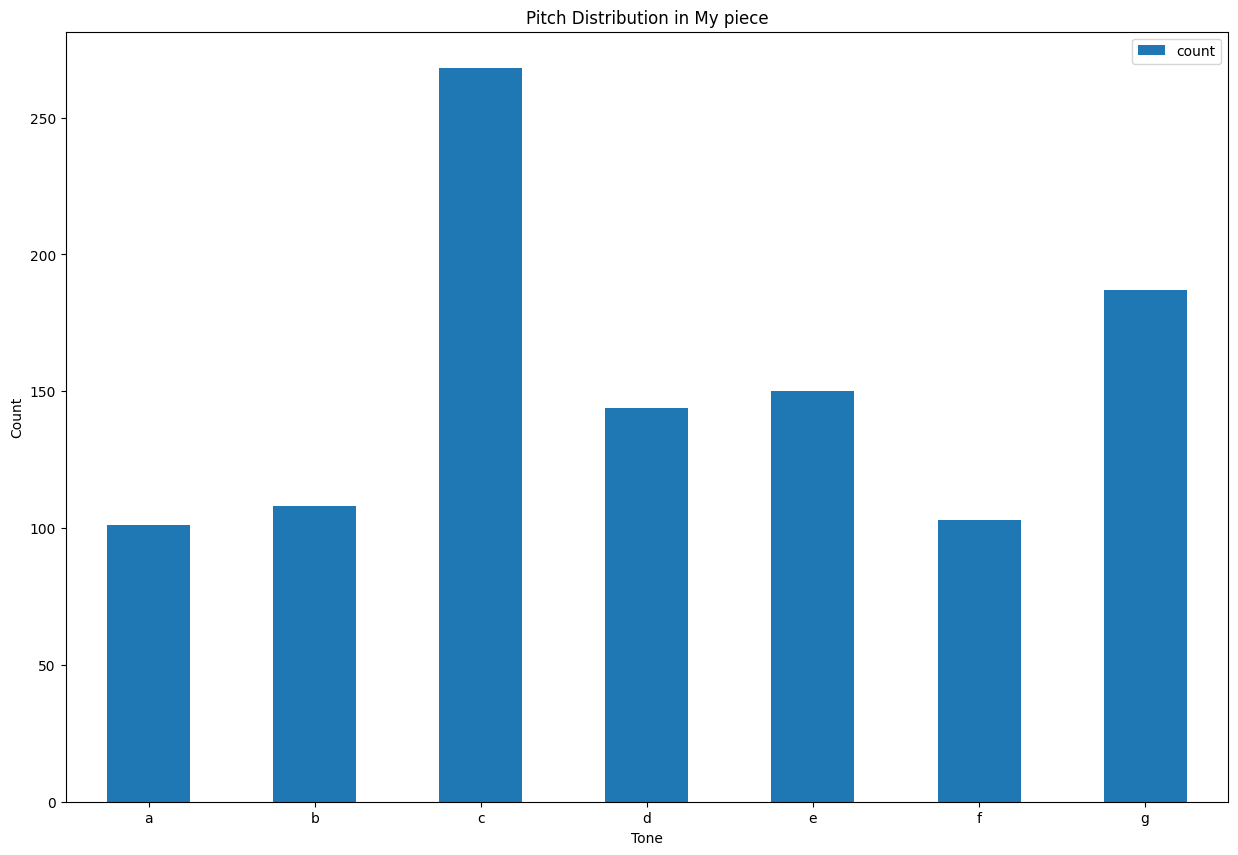

In [30]:
counted_notes.plot(kind="bar", figsize=(15, 10))
plt.title("Pitch Distribution in My piece")
plt.xticks(rotation = 0)
plt.xlabel("Tone")
plt.ylabel("Count")
plt.show()


#### Working with Measures

It is oftentimes useful to look at **measures** – either all at once or specific ones. Here's an example:

In [63]:
# last pitch in last measure, for each voice
measures = my_soup_file.find_all('measure')
last_measure = measures[-1]
for staff in last_measure.find_all('staff'):
        note = staff.find_all('note')[-1]
        print(note.get('pname'))


c
g
c
c


Working with **Score Definitions** (scoreDef), it is possible to search for certain **events** within the piece. For example, find out where a **Time Signature change** occurs:

In [68]:
scoredefs = my_soup_file.find_all('scoreDef')
ts_dict_list = []
for scoredef in scoredefs:
    next_measure = scoredef.find_next('measure', )
    ts_dict = {'m_count' : scoredef.get('meter.count'),
               'unit_count' : scoredef.get('meter.unit'),
               'measure' : next_measure.get('n')}
    ts_dict_list.append(ts_dict)
df = pd.DataFrame(ts_dict_list)
df

,m_count,unit_count,measure
0,4,2,1
1,3,1,93
2,4,2,109
3,8,2,150


In [76]:
# the empty list
list_dicts = []

# get composer and title from mei file
composer = my_soup_file.find("persName", {"role": "composer"})
title = my_soup_file.find('title')

measures = my_soup_file.find_all('measure')
last_measure = measures[-1]
last_staff =  last_measure.find_all('staff')[-1]
last_note = last_staff.find_all('note')[-1]

# iterate through the staves, making a temporary dictionary for each, consisting of composer, title, voice, clef shape, clef line, key signature, and last note
for staff in my_soup_file.find_all('staffDef'):
    temp_dict = {"Composer": composer.text,
                 "Title": title.text,
                 "Voice_Name": staff.text.strip(),
                 "Clef_Shape": staff.get('clef.shape'),
                 "Clef_Line": staff.get('clef.line'),
                 "Key_Signature": staff.get('key.sig'),
                 "Last_Lowest_Note": last_note.get('pname')}
# add each temp dict to the list
    list_dicts.append(temp_dict)

# pass the list of temp dicts to make a df
df = pd.DataFrame.from_dict(list_dicts)
df

,Composer,Title,Voice_Name,Clef_Shape,Clef_Line,Key_Signature,Last_Lowest_Note
0,Josquin Des Prés,Ave Maria,[Superius],G,2,0,c
1,Josquin Des Prés,Ave Maria,Altus,G,2,0,c
2,Josquin Des Prés,Ave Maria,Tenor,G,2,0,c
3,Josquin Des Prés,Ave Maria,Bassus,F,4,0,c


Finally, we can look for some very specific things, like **all notes with a particular duration, pitch, and octave**:

* Use dictionary of key/value pairs to specify particular attributes.

>`my_soup_file.find_all('note', {'dur': "4", 'pname': "g", 'oct': '3'})`

In [65]:

my_soup_file.find_all('note', {'dur': "4", 'pname': "g", 'oct': '3'})

[<note dur="4" dur.ppq="256" oct="3" oct.ges="2" pname="g" pnum="43" stem.dir="up" xml:id="m-298"/>,
 <note dur="4" dur.ppq="256" oct="3" oct.ges="2" pname="g" pnum="43" stem.dir="up" xml:id="m-1655"/>,
 <note dur="4" dur.ppq="256" oct="3" oct.ges="2" pname="g" pnum="43" stem.dir="up" xml:id="m-1693"/>,
 <note dur="4" dur.ppq="256" oct="3" oct.ges="2" pname="g" pnum="43" stem.dir="up" xml:id="m-1912"/>,
 <note dur="4" dur.ppq="256" oct="3" pname="g" pnum="55" stem.dir="down" xml:id="m-2237"/>,
 <note dur="4" dur.ppq="256" oct="3" pname="g" pnum="55" stem.dir="down" xml:id="m-3812"/>,
 <note dur="4" dur.ppq="256" oct="3" oct.ges="2" pname="g" pnum="43" stem.dir="up" xml:id="m-3849"/>]

## Save Revised XML document

In [87]:
with open(file_name, 'w') as f:
    f.write(str(my_soup_file))

In [89]:
basename = os.path.splitext(os.path.basename(url))[0]
extension = os.path.splitext(os.path.basename(url))[-1]

In [90]:
extension

'.mei'

In [91]:
basename

'CRIM_Model_0008'